In [1]:
import scipy.io as sio
import urllib.request
import os.path as op
import matplotlib.pyplot as plt
import time

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

/Users/arokem/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
t1 = time.time()

if not op.exists('fashion.mat'):
    urllib.request.urlretrieve("https://s3.amazonaws.com/assets.datacamp.com/production/course_6052/datasets/fashion.mat", "fashion.mat")

#_mat = sio.loadmat('/usr/local/share/datasets/fashion.mat')
_mat = sio.loadmat('./fashion.mat')

x_train = _mat['x_train']
x_test = _mat['x_test']
y_train = _mat['y_train']
y_test = _mat['y_test']

img_rows = 28
img_cols = 28
batch_size = 10
epochs = 4
num_classes = 3
input_shape = (img_rows, img_cols, 1)

In [4]:
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)

In [5]:
x_train.shape

(600, 784)

In [6]:
28 * 28

784

In [7]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(x_train.shape[-1],)))

model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
training = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs)


Train on 480 samples, validate on 120 samples
Epoch 1/4
480/480 [==============================] - 0s 1ms/step - loss: 0.5736 - acc: 0.8313 - val_loss: 0.2779 - val_acc: 0.9167
Epoch 2/4
480/480 [==============================] - 0s 184us/step - loss: 0.1667 - acc: 0.9396 - val_loss: 0.2179 - val_acc: 0.9083
Epoch 3/4
480/480 [==============================] - 0s 211us/step - loss: 0.1195 - acc: 0.9542 - val_loss: 0.2490 - val_acc: 0.9083
Epoch 4/4
480/480 [==============================] - 0s 331us/step - loss: 0.1042 - acc: 0.9667 - val_loss: 0.1990 - val_acc: 0.9167


In [5]:
score = model.evaluate(x_test, y_test, verbose=0)

In [6]:
print(score)

[0.3080539506673813, 0.9]


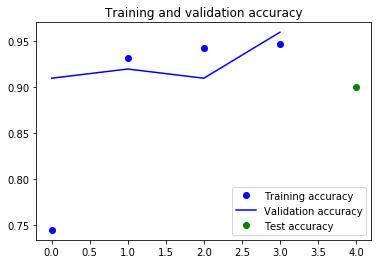

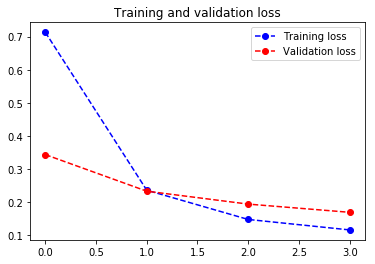

This took 3.344472885131836 seconds


In [7]:
accuracy = training.history['acc']
val_accuracy = training.history['val_acc']
loss = training.history['loss']
val_loss = training.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs[-1] + 1, score[-1], 'go', label='Test accuracy')
plt.legend()


plt.figure()
plt.plot(epochs, loss, 'bo--', label='Training loss')
plt.plot(epochs, val_loss, 'ro--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print("This took %s seconds" % (time.time() - t1) )